## Preliminaries

### Imports

In [1]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold

%matplotlib inline

### Random Seed

In [2]:
seed=136
np.random.seed(seed)

### Data Directories

In [3]:
raw_data_dir=r"../../raw/C50/C50train"
test_dir    =r"../../raw/C50/C50test"
data_dir=r"../../data/C50"


## Document Data

### Corpus (List of documents)

In [4]:
documents_filename=data_dir+"/C50_documents.csv"
documents=pd.read_csv(documents_filename,index_col="document_id")
documents.head()

,filename,label
document_id,,
0,../../raw/C50/C50train/RobinSidel/147604newsML...,RobinSidel
1,../../raw/C50/C50train/RobinSidel/196812newsML...,RobinSidel
2,../../raw/C50/C50train/RobinSidel/219316newsML...,RobinSidel
3,../../raw/C50/C50train/RobinSidel/251225newsML...,RobinSidel
4,../../raw/C50/C50train/RobinSidel/177958newsML...,RobinSidel


In [5]:
test_documents_filename=data_dir+"/C50_test_documents.csv"
test_documents=pd.read_csv(test_documents_filename,index_col="document_id")
test_documents.head()

,filename,label
document_id,,
0,../../raw/C50/C50test/RobinSidel/347781newsML.txt,RobinSidel
1,../../raw/C50/C50test/RobinSidel/306379newsML.txt,RobinSidel
2,../../raw/C50/C50test/RobinSidel/324849newsML.txt,RobinSidel
3,../../raw/C50/C50test/RobinSidel/284041newsML.txt,RobinSidel
4,../../raw/C50/C50test/RobinSidel/363477newsML.txt,RobinSidel


### Load Pre-Trained Features

#### Load Features

<div class="alert alert-block alert-info"> Problem 1.0 </div>
Load the diagram features from files `digram_features.p` and digram_test_features.p` from the data directory (you generated this files while running 'TexFeatures' notebook)

In [6]:
d_features=pickle.load(open(data_dir+'/digram_features.p',"rb"))
d_test_features=pickle.load(open(data_dir+'/digram_test_features.p',"rb"))

In [7]:
d_features.shape, d_features.shape

((2500, 382647), (2500, 382647))

<div class="alert alert-block alert-info"> Problem 1.2 </div>
How many documents are collected in `features`?

In [8]:
print(d_features.shape)
print(f'There are {d_features.shape[0]} documents are collected in digram_features.')

(2500, 382647)
There are 2500 documents are collected in digram_features.


<div class="alert alert-block alert-info"> Problem 1.3 </div>
What is the size of the digram vocabulary?

In [9]:
d_features.shape[1]

382647

<div class="alert alert-block alert-info"> Problem 1.4 </div>
save the features of the  first document into a vector named `v`.
What is its shape?

In [10]:
v=d_features[0, :]
v.shape

(1, 382647)

<div class="alert alert-block alert-info"> Problem 1.5 </div>

Do we need to normalize the vector features? how can you tell?

In [11]:
print('Yes, we need to normalize the vector features, so that we can have feature frequencies.')

Yes, we need to normalize the vector features, so that we can have feature frequencies.


<div class="alert alert-block alert-info"> Problem 1.6 </div>
If necesary: use `sklearn.preprocessing.normalize` to normalize features and test features.

In [12]:
d_features=normalize(d_features)
d_test_features=normalize(d_test_features)

## K-Neighbors Text Classification

<div class="alert alert-block alert-info"> Problem 2.0 </div>
using `sklearn.model_selection.train_test_split` to separate data into a 90% training set an a 10% validation set

In [13]:
train_features, validation_features, label_train, label_validation = train_test_split(d_features, documents['label'], test_size=0.1)

<div class="alert alert-block alert-info"> Problem 2.1 </div>
Show the sizes of train and validation sets

In [14]:
print(train_features.shape)
print(validation_features.shape)

(2250, 382647)
(250, 382647)


<div class="alert alert-block alert-info"> Problem 2.2 </div>
To check that all your inputs are set up correctly use `sklearn.neighbors.KNeighborsClassifier` to fit a nearest neighbor classifier to the training data

In [15]:
knc=KNeighborsClassifier(1)
knc.fit(train_features, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

<div class="alert alert-block alert-info"> Problem 2.3 </div>
What is the predicted label for the first document on the test set?
Does it agree with the true label for that document?

In [ ]:
pred_validation=knc.predict(validation_features)
print('The predicted labels are:', pred_validation[:5], '...')
print('The real labels are', label_validation[:5])
print('It agreed with true label with:', np.average(pred_validation == label_validation))


In [ ]:
knc.get_params

<div class="alert alert-block alert-info"> Problem 2.4 </div>
Use the train/valuation split to select the optimal number of neighbors K in K-neighbors classifier. Use accuracy as 
your selection metric.

In [ ]:
type(validation_features)

In [ ]:
type(label_train)

In [17]:
k_range=np.arange(1, 20)

result_accuracy=0
best_k=0

for k in k_range:
    knc2=KNeighborsClassifier(k)
    knc2.fit(train_features, label_train)
    
    pred_validation=knc2.predict(validation_features)
    
    accuracy=np.mean(pred_validation == label_validation)
    print(accuracy)
    
    if result_accuracy < accuracy:
        result_accuracy=accuracy
        best_k=k
   
print(f'The best accuracy is {result_accuracy}, with k_value: {best_k}.')
    
    

0.764
0.684
0.656
0.64
0.636
0.608
0.572
0.58
0.56
0.544
0.56
0.556
0.552
0.532
0.54
0.552
0.544
0.544
0.52
The best accuracy is 0.764, with k_value: 1.


<div class="alert alert-block alert-info"> Problem 2.5 </div>
Re-train the best model will all non-test documents and evaluate performance on the test data set.

In [18]:
best_k=1
knc3=KNeighborsClassifier(1)
knc3.fit(d_features, documents['label'])

pred_test=knc3.predict(d_test_features)

accuracy=np.mean(pred_test == test_documents['label'])
print('The best model performance on test data is: ', accuracy)

The best model performance on test data is:  0.5056


<div class="alert alert-block alert-info"> Problem 2.6 </div>
Is there a significant difference between the performance in the training and test set? can you speculate on why?

##### Yes, there is. Since knn with 1 nesteat neighbor is high variance and low bias, it should perform much better on train set than test set. Hence, our test accuracy are much worse than train accuracy.

### Naive Bayes Classifier Amazon Reviews

In [19]:
data_dir=r"../../raw/amazon-reviews"

In [20]:
reviews_filename=data_dir+"/reviews.csv"    

<div class="alert alert-block alert-info"> Problem 3.0 </div>
Save file `reviews.csv` posted in canvas into the `data_dir` above

<div class="alert alert-block alert-info"> Problem 3.1 </div>
Read the reviews file into a data frame

In [21]:
reviews=pd.read_csv(reviews_filename)

<div class="alert alert-block alert-info"> Problem 3.2 </div>
Use panda's function isna() to count how many rows have a missing "Summary" column

In [22]:
nan_count=np.sum(reviews.isna(), axis=1)
print(np.unique(nan_count, return_counts=True))
print('There are 43 rows')

(array([0, 1]), array([568411,     43]))
There are 43 rows


<div class="alert alert-block alert-info"> Problem 3.3 </div>
Use panda's function fillna() to turn missing summaries into empty ("") summaries

In [23]:
reviews['Summary']=reviews['Summary'].replace(np.nan, '')
print(np.unique(reviews['Summary'].isna(), return_counts=True))
print('All summaries are converted.')

(array([False]), array([568454]))
All summaries are converted.


<div class="alert alert-block alert-info"> Problem 3.4 </div>
Create two numpy arrays:
1. `documents_all` containing the contents of the "Summary" column, after replacing `nan`s by empty strings.
2. `labels_all` containing the "Score" column


In [24]:
documents_all=reviews['Summary'].values
labels_all=reviews['Score'].values

<div class="alert alert-block alert-info"> Problem 3.5 </div>
Split `all_documents` and `labels_all` into a training  and test document set using a 10% test split

In [25]:
review_train, review_test, label_train, label_test=train_test_split(documents_all, labels_all, test_size=0.1)

In [26]:
print(review_train.shape, review_test.shape)

(511608,) (56846,)


<div class="alert alert-block alert-info"> Problem 3.6 </div>
Create `count`, `set` and `Tfidf` features both for your training and test sets using `CountVectorizer` and `TfidfVectorizer`.
1. Set the `input` variable to "content", as the document array contains the text of the documents not  their filenames as in the `C50` example.
2. ** Do not ** set the `tokenizer` and `stopword` variables, they slow down the processing significantly, and, for this example do not really improve performance.

In [27]:
countVectorizer=CountVectorizer(input='content')

In [28]:
setVectorizer=CountVectorizer(input='content', binary=True)

In [29]:
tfIdfVectorizer=TfidfVectorizer(input="content")

In [30]:
count=countVectorizer.fit_transform(review_train)
set_=setVectorizer.fit_transform(review_train)
Tfidf=tfIdfVectorizer.fit_transform(review_train)

In [31]:
count_test=countVectorizer.transform(review_test)
set_test=setVectorizer.transform(review_test)
tfidf_test=tfIdfVectorizer.transform(review_test)

<div class="alert alert-block alert-info"> Problem 3.7 </div>
Show the number of documents in the training set, and the size of the vocabulary.

In [32]:
print('The number of documents in the training set is: ', review_train.shape[0])

The number of documents in the training set is:  511608


<div class="alert alert-block alert-info"> Problem 3.8 </div>
We will perform binary classification: create `Y` and `Y_test` variables that are true if the review score is larger than 3
(positive review) and false otherwise (negative review)

In [33]:
len(label_train)

511608

In [34]:
## 最后是predict 是否大于3

In [35]:
## new constructed label
Y=label_train > 3
Y_test=label_test > 3

<div class="alert alert-block alert-info"> Problem 3.9 </div>
What proportion of reviews are positive on the training set?

In [36]:
np.average(Y)

0.7806367375021501

<div class="alert alert-block alert-info"> Problem 3.10 </div>
To check that you have all your inputs set up correctly check that you
can fit a `MultinomialNB` with smoothing $\alpha=1$ to the count features.
What prediction accuracy do you obtain *in sample* in the training set?

In [37]:
mnb=MultinomialNB(alpha=1.0)
mnb.fit(count, Y)
np.average(mnb.predict(count)==Y)

0.8856605056996764

In [38]:
mnb.predict(count)

array([ True, False,  True, ...,  True,  True,  True])

<div class="alert alert-block alert-info"> Problem 3.11 </div>
Use K-Fold validation with K=10 to select between multinomial Naive Bayes classifiers trained to either `set`, `count` and `tfidf` featues. Find the features that have the best accuracy. 


State clearly what model you selected.

[HINT] 
1. Look and how this is done on the `Validate_Text` notebook.
2. You can reuse any code you find useful on the `Validate_Text` notebook.

In [39]:
def model_cross_validation(model,X,y,folds):
    '''
    model: the model we want to test
    X: full_ x data
    y: full_ y data
    fold: a kfold type object that should be defined (containing number of folds)
    
    '''
    kfolds=len(folds)
    train_performance=np.empty(kfolds)
    validation_performance=np.empty(kfolds)
    
    for idx in range(kfolds):
        # seperate train and validation set from idx_th fold
        train,validation=folds[idx]
        # get train set accuracy
        X_train=X[train]
        y_train=y[train]
        model.fit(X_train,y_train)
        train_accuracy=np.average(model.predict(X_train)==y_train)
        # get validation set accuracy 
        X_validation=X[validation]
        y_validation=y[validation]
        validation_accuracy=np.average(model.predict(X_validation)==y_validation)
        
        # save accuracy results in train/ validation performance list
        train_performance[idx]=train_accuracy
        validation_performance[idx]=validation_accuracy
        
    return train_performance,validation_performance

In [40]:
kf=KFold(10,shuffle=True)
folds=list(kf.split(set_))

In [41]:
## use array as input Y

## count_
train_count,validation_count=model_cross_validation(mnb,count,Y,folds)
print(train_count.mean(),validation_count.mean()) 

## set_
train_set,validation_set=model_cross_validation(mnb,set_,Y,folds)
print(train_set.mean(),validation_set.mean()) 

## tfidf
train_tfidf, validation_tfidf=model_cross_validation(mnb, Tfidf, Y, folds)
print(train_tfidf.mean(),validation_tfidf.mean())

0.8859732451489319 0.8772810421374558
0.8860505613197704 0.8773005876266156
0.8779084767890643 0.8698261219288742


In [42]:
set_.shape

(511608, 32010)

<div class="alert alert-block alert-info"> Problem 3.12 </div>
Fit the best model to all the training data and compute its accuray on the test set

In [43]:
## set is the best model here; so choose set to train all training data
mnb.fit(set_, Y)
print('The accuracy is: ', np.average(mnb.predict(set_test)==Y_test))
set_accuracy=np.average(mnb.predict(set_test)==Y_test)

The accuracy is:  0.8791647609330472


<div class="alert alert-block alert-info"> Problem 3.13</div>
Make a box plot showing the distribution of `set`, `count` and `tfidf` accuracies on the K fold cross-validations.

Display clearly in the graph the performance of the best model trained on all the data on the test set.


In [44]:
## combined together and make a transpose 3*10 -> 10*3
datav=np.vstack((validation_count,validation_set,validation_tfidf)).T
data=pd.DataFrame(datav,columns=["Count","Set","Tfidf"])

In [45]:
datav

array([[0.87652704, 0.8769766 , 0.87037001],
       [0.87832529, 0.87814937, 0.86767264],
       [0.8777389 , 0.87762163, 0.8704091 ],
       [0.87568656, 0.87576474, 0.87095639],
       [0.87871621, 0.87910713, 0.86833721],
       [0.87717206, 0.87678114, 0.87021364],
       [0.87666387, 0.8767616 , 0.86857176],
       [0.87801255, 0.87820801, 0.86949043],
       [0.87916341, 0.87887021, 0.87388585],
       [0.87480453, 0.87476544, 0.86835418]])

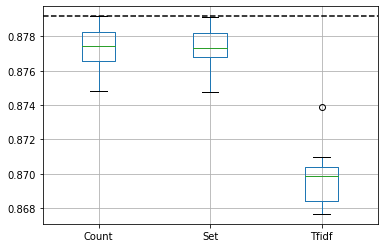

In [46]:
ax=data.boxplot()
ax.axhline(y=set_accuracy,linestyle="dashed",color="k")

<div class="alert alert-block alert-info"> Problem 3.14</div>
1. Why do the `test` and `count` results look so similar in this case?
2. Comment on the difference between cross-validation average performace and test performance

1. Set and count here are from same 'CountVectorizer' function, and since the summary is short, there is a high possibility that there are only a few duplicated words in the summary. Hence, the array output for count and set should be similar. 

2. The test set performance is better than validation set performance. It is basically because we use both validation set and training set to learn,  more training data can give a relatively higher accuracy.

<div class="alert alert-block alert-info"> Problem 4.0 </div>
With the best features  features fitted to the full training set:
use `sklearn` `model.predict_prob` function to compute the probabilities of the positive class.

[HINT] `model.predict_prob` returns probabilities for both the negative and positive class, we only need the positive class

In [47]:
mnb.predict(count)

array([ True, False,  True, ...,  True,  True,  True])

In [48]:
mnb.predict_proba(set_test)

array([[1.10118730e-02, 9.88988127e-01],
       [9.49081388e-01, 5.09186119e-02],
       [8.74849893e-04, 9.99125150e-01],
       ...,
       [1.89052580e-02, 9.81094742e-01],
       [1.69826684e-02, 9.83017332e-01],
       [4.92604273e-01, 5.07395727e-01]])

In [49]:
positive_prob=mnb.predict_proba(set_test)[:, 1]
print(positive_prob)

[0.98898813 0.05091861 0.99912515 ... 0.98109474 0.98301733 0.50739573]


In [50]:
Y_test

array([ True, False,  True, ...,  True,  True,  True])

<div class="alert alert-block alert-info"> Problem 4.1 </div>
use `sklearn` `metrics.roc_curve` to create a roc_curve for the best features classifier

Plot the ROC curve.

Text(0, 0.5, 'tpr')

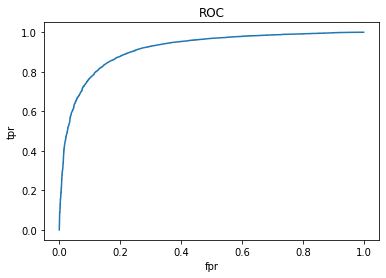

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, positive_prob)
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('fpr')
plt.ylabel('tpr')

<div class="alert alert-block alert-info"> Problem 4.2 </div>
1. Find the point on the ROC curve with a threshold probability closest to 0.5.
2. Show its rate of false positives and of false negatives.
3. Show its accuracy and compare it to the best classifier accuracy that you computed before

In [52]:
index_=np.argmin((thresholds-0.5)**2)
print(index_, thresholds[index_])

11415 0.4999348767199922


In [53]:
print('The false positives rate is: ', fpr[index_])
print('The false negative rate is: ', 1-tpr[index_])

The false positives rate is:  0.33095027713069325
The false negative rate is:  0.061941122147892824


In [54]:
## accuracy=positive class rate*TPR + negative class rate * TNR
print('The accuracy is: ', (1-fpr[index_])*np.average(Y==0)+tpr[index_]*np.average(Y==1))

The accuracy is:  0.8790481519732904


In [55]:
print('The set accuracy is: ', set_accuracy)
print('They are pretty closed. ROC with threshold 0.5 is a little bit better.')

The set accuracy is:  0.8791647609330472
They are pretty closed. ROC with threshold 0.5 is a little bit better.


<div class="alert alert-block alert-info"> Problem 4.3 </div>
Redraw the ROC curve, highlighting the point of the curve that correspont to optimal accuracy.

Text(0.5, 1.0, 'Roc curve marked with optimal accuracy point')

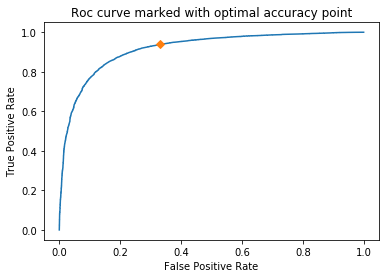

In [56]:
plt.plot(fpr,tpr,label="set")
plt.plot([fpr[index_]], [tpr[index_]], marker='D')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Roc curve marked with optimal accuracy point')